# Tema Project
Prediksi Harga Bahan Pokok di Indonesia

# Deskripsi Data
Sumber data yang digunakan pada penelitian ini merupakan data sekunder milik PUSAT INFORMASI HARGA PANGAN STRATEGIS NASIONAL(PIHPS Nasional) yang diunduh melalui tautan https://hargapangan.id/tabel-harga/pasar-tradisional/daerah

## Import Library

In [3]:
# import pandas
import pandas as pd
# import os
import os
# import matplotlib
import matplotlib.pyplot as plt
# import numpy
import numpy as np
# import seaborn
import seaborn as sns
# import datetime
import datetime
# import warnings
import warnings
warnings.filterwarnings('ignore')

# Data Preparation

### Load Dataset

In [4]:
sembako = pd.read_excel('Sembako.xlsx', sheet_name = 'Transform')
sembako.head()

,Tanggal,Beras,Daging Ayam,Daging Sapi,Telur Ayam,Bawang Merah,Bawang Putih,Cabai Merah,Cabai Rawit,Minyak Goreng,Gula Pasir
0,02/11/2020,11800,34100,117850,24850,35450,27750,43700,35550,14250,14350
1,03/11/2020,11800,34200,118150,24900,35850,27900,43850,35200,14250,14400
2,04/11/2020,11800,34350,118300,24900,36050,27900,43750,35300,14250,14400
3,05/11/2020,11800,34500,118250,24950,36300,27950,43600,35500,14250,14400
4,06/11/2020,11800,34650,118250,25050,36700,28100,43350,35700,14250,14400


### Check Data Info

In [3]:
sembako.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tanggal        244 non-null    object
 1   Beras          244 non-null    int64 
 2   Daging Ayam    244 non-null    int64 
 3   Daging Sapi    244 non-null    int64 
 4   Telur Ayam     244 non-null    int64 
 5   Bawang Merah   244 non-null    int64 
 6   Bawang Putih   244 non-null    int64 
 7   Cabai Merah    244 non-null    int64 
 8   Cabai Rawit    244 non-null    int64 
 9   Minyak Goreng  244 non-null    int64 
 10  Gula Pasir     244 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 21.1+ KB


Tahap pertama adalah melakukan pengecekan data menggunakan method info() yang dapat membantu memberikan gambaran mengenai dataset. Maka dihasilkan output berupa nomor index beserta tipe data dari setiap kolom, serta range index sebanyak 244 entries.
Data Kolom Tanggal berupa objek (string) dan kolom lainnya adalah integer (bilangan bulat).

# Data Pre-processing

## Konversi Tipe Data Kolom Tanggal ke Format Date Time

In [5]:
sembako['Tanggal'] = pd.to_datetime(sembako['Tanggal'], format = '%d/%m/%Y', yearfirst = True)

Mengkonversi tipe data kolom tanggal ke format datetime adalah memberi tahu Python bahwa kita akan menggunakan fungsi dari modul datetime di program kita. Setelah dipanggil, semua fungsi yang ada di datetime dapat kita gunakan.

## Set Kolom Tanggal Sebagai Index

In [6]:
sembako = sembako.set_index('Tanggal')
sembako.head()

,Beras,Daging Ayam,Daging Sapi,Telur Ayam,Bawang Merah,Bawang Putih,Cabai Merah,Cabai Rawit,Minyak Goreng,Gula Pasir
Tanggal,,,,,,,,,,
2020-11-02,11800,34100,117850,24850,35450,27750,43700,35550,14250,14350
2020-11-03,11800,34200,118150,24900,35850,27900,43850,35200,14250,14400
2020-11-04,11800,34350,118300,24900,36050,27900,43750,35300,14250,14400
2020-11-05,11800,34500,118250,24950,36300,27950,43600,35500,14250,14400
2020-11-06,11800,34650,118250,25050,36700,28100,43350,35700,14250,14400


Dalam analisis data adakalanya kita ingin menjadikan kolom sebagai indeks untuk mempermudah proses analisis. Menjadikan salah satu kolom maupun beberapa kolom sebagai indeks pada dataframe Pandas dapat menggunakan fungsi set_index().

## Melihat Statistik Deskriptif Dari Dataset

In [6]:
sembako.describe()

,Beras,Daging Ayam,Daging Sapi,Telur Ayam,Bawang Merah,Bawang Putih,Cabai Merah,Cabai Rawit,Minyak Goreng,Gula Pasir
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,11746.311475,35238.114754,121888.319672,25626.434426,33402.459016,29515.573770,41279.508197,53802.049180,15131.762295,14233.401639
std,60.745720,1456.799769,2714.766215,1286.031312,2412.845872,809.106655,8511.822459,14254.245483,728.212599,130.609156
min,11650.000000,32000.000000,117850.000000,22950.000000,29250.000000,27750.000000,28000.000000,35200.000000,14250.000000,14000.000000
25%,11700.000000,34450.000000,119350.000000,25100.000000,31637.500000,28750.000000,33837.500000,39300.000000,14500.000000,14100.000000
50%,11750.000000,35100.000000,122850.000000,25850.000000,33200.000000,29700.000000,41350.000000,51825.000000,14950.000000,14250.000000
75%,11800.000000,36100.000000,124050.000000,26300.000000,35100.000000,30150.000000,49087.500000,68550.000000,15612.500000,14350.000000
max,11850.000000,39050.000000,133250.000000,28850.000000,38450.000000,31000.000000,59550.000000,79100.000000,17400.000000,14450.000000


## Check Missing Values

In [7]:
sembako.isnull().sum()

Beras            0
Daging Ayam      0
Daging Sapi      0
Telur Ayam       0
Bawang Merah     0
Bawang Putih     0
Cabai Merah      0
Cabai Rawit      0
Minyak Goreng    0
Gula Pasir       0
dtype: int64

Jika data terdiri dari ratusan, ribuan bahkan jutaan baris tentu akan susah dalam menemukan nilai field yang kosong. Python Pandas memungkinkan kita dapat menemukan missing value secara cepat dengan fungsi isnull() dan agar lebih mudah dipahami maka dilakukan agregasi data dengan fungsi sum(). Berdasarkan hasil di atas, data yang ada tidak memiliki missing value sehingga dapat dilanjutkan ke tahap selanjutnya.

## Melihat Korelasi Antar Variabel

Tabel berikut menampilkan hasil korelasi dari setiap attribut pada dataset.

In [8]:
# mendapatkan korelasi di setiap fitur dalam dataset
corrmat = sembako.corr()
corrmat

,Beras,Daging Ayam,Daging Sapi,Telur Ayam,Bawang Merah,Bawang Putih,Cabai Merah,Cabai Rawit,Minyak Goreng,Gula Pasir
Beras,1.000000,0.160518,-0.752760,0.683692,0.587711,-0.541386,0.845431,0.629328,-0.931588,0.918106
Daging Ayam,0.160518,1.000000,0.147821,0.106800,-0.233287,0.049961,0.157273,0.030741,-0.032819,0.125754
Daging Sapi,-0.752760,0.147821,1.000000,-0.410688,-0.532441,0.751571,-0.676901,-0.344673,0.751318,-0.787561
Telur Ayam,0.683692,0.106800,-0.410688,1.000000,0.552777,-0.274542,0.604404,0.392587,-0.743868,0.692486
Bawang Merah,0.587711,-0.233287,-0.532441,0.552777,1.000000,-0.163238,0.436044,0.106665,-0.675835,0.567975
Bawang Putih,-0.541386,0.049961,0.751571,-0.274542,-0.163238,1.000000,-0.560289,-0.126019,0.530531,-0.699175
Cabai Merah,0.845431,0.157273,-0.676901,0.604404,0.436044,-0.560289,1.000000,0.720752,-0.775036,0.828098
Cabai Rawit,0.629328,0.030741,-0.344673,0.392587,0.106665,-0.126019,0.720752,1.000000,-0.542091,0.481117
Minyak Goreng,-0.931588,-0.032819,0.751318,-0.743868,-0.675835,0.530531,-0.775036,-0.542091,1.000000,-0.910083
Gula Pasir,0.918106,0.125754,-0.787561,0.692486,0.567975,-0.699175,0.828098,0.481117,-0.910083,1.000000


In [8]:
def get_redundant_pairs(sembako):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = sembako.columns
    for i in range(0, sembako.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(sembako, n=5):
    au_corr = sembako.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(sembako)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(sembako, 3))

Top Absolute Correlations
Beras          Minyak Goreng    0.931588
               Gula Pasir       0.918106
Minyak Goreng  Gula Pasir       0.910083
dtype: float64


Pada tujuan tertentu, peneliti membutuhkan informasi mengenai atribut manakah yang mamiliki nilai koreasi tertinggi. Pada formula diatas, dibentuk fungsi yang akan menampilkan 3 pasangan atribut yang memiliki korelasi tertinggi.

# Pemilihan Data

Dari komoditi bahan pokok yang ada, maka fokus capaian analisis ini adalah untuk mendapatkan model prediksi harga telur selama beberapa periode kedepan.

## Membuat Dataframe Baru

Tujuan riset ini adalah memprediksi harga telur ayam, maka langkah awal tahap pemodelan adalah membuat data frame baru yang hanya berisi data telur ayam dari dataset sembako dengan menggunakan ['nama kolom'].

Selanjutnya adalah menambahkan kolom baru berupa index hari dari data deret waktu harga telur ayam, sehingga peneliti dan pembaca dapat mengetahi index hari dari setiap observasi harga telur ayam.

In [9]:
#membuat dataframe baru
sembako_telur = sembako['Telur Ayam']
sembako_telur = sembako_telur.to_frame()

In [10]:
#menambahkan kolom baru
sembako_telur['Hari-ke'] = [i for i in range(len(sembako))]

In [11]:
#merubah index
sembako_telur = sembako_telur.reset_index()
sembako_telur = sembako_telur.set_index('Hari-ke')
sembako_telur.head()

,Tanggal,Telur Ayam
Hari-ke,,
0,2020-11-02,24850
1,2020-11-03,24900
2,2020-11-04,24900
3,2020-11-05,24950
4,2020-11-06,25050


# Data Visualization

## Plot Harga Sembako

<Figure size 720x1080 with 0 Axes>

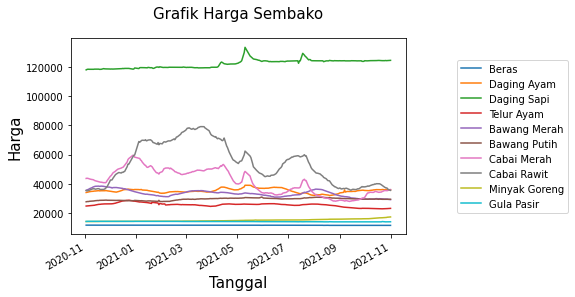

In [12]:
plt.figure(figsize=(10,15))
sembako.plot()
plt.title('Grafik Harga Sembako', fontsize = 15, pad = 20)
plt.ylabel('Harga', fontsize = 15)
plt.xlabel('Tanggal', fontsize = 15)
plt.legend(loc = 'right', bbox_to_anchor=(1.5, 0.5))
plt.show()

## Heatmap Korelasi

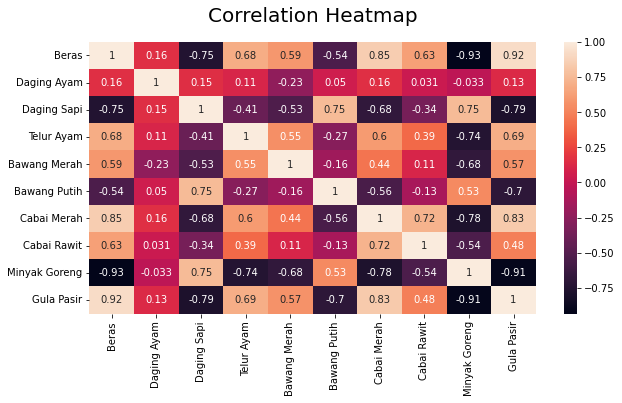

In [13]:
# membuat heatmap korelasi
plt.figure(figsize=(10,5))
sns.heatmap(corrmat, annot=True).set_title('Correlation Heatmap', fontsize=20, pad=20)
plt.show()

* Pada baris pertama, korelasi antara beras dengan fitur lain dimana ada relasi kuat positif dengan variabel minyak goreng dan diikuti oleh variabel daging sapi
* Pada baris keempat, korelasi antara telur ayam dengan minyak goreng menunjukan terdapat relasi kuat positif diantara keduanya.

## Grafik Pola Harga Telur Ayam

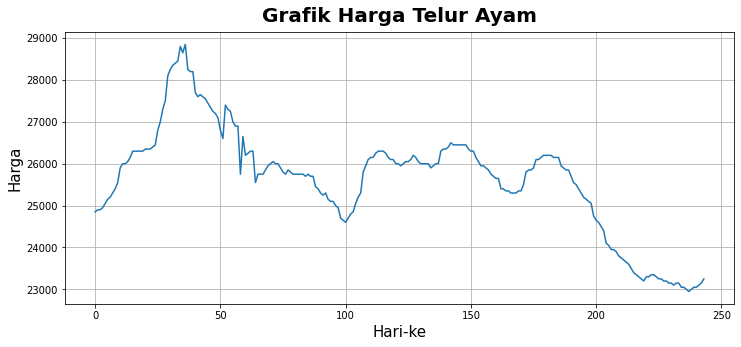

In [14]:
plt.figure(figsize=(12,5))
sembako_telur['Telur Ayam'].plot()
plt.title('Grafik Harga Telur Ayam', fontsize = 20, pad = 10, fontweight = 'bold')
plt.ylabel('Harga', fontsize = 15)
plt.xlabel('Hari-ke', fontsize = 15)
plt.grid()
plt.show()

Grafik diatas menampilakn status harian harga telur ayam selama 244 hari mulai dari hari ke-0 sampai hari ke-243, terlihat bahwa data tidak memiliki pola tertentu.

Diduga data belum stasioner, sehingga perlu dilakukan suatu metode untuk membuat data menjadi stasioner. Untuk memastikan statisoneritas data, maka dilakukan deteksi stasioner menggunakan metode Augmented Dicky Fuller Test.

# Stasioneritas Data

## Cek Stasionaritas

Cek stasionaritas data akan dilakukan dengan metode Augmented Dickey Fuller Test. Jika nilai `p-value < 0.05` maka data sudah stastioner. Sebaliknya, jika nilai `p-value > 0.05` maka data belum stasioner dan perlu dilakukan differencing.

In [15]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(sembako_telur['Telur Ayam'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[0]<0.05:
    print('Data telah stasioner')
else:
    print('Data belum stasioner')

ADF Statistic: -1.396670
p-value: 0.583872
Data telah stasioner


Berdasarkan hasil di atas maka data yang ada belum stasioner dan perlu dilakukan proses differencing untuk me-stasioner-kan data.

## Differencing

Proses ini disebut juga proses “pembedaan ordo pertama”. Dengan demikian dapat dilakukan juga proses pembedaan ordo kedua, ketiga, dan seterusnya hingga menjadi stasioner. 

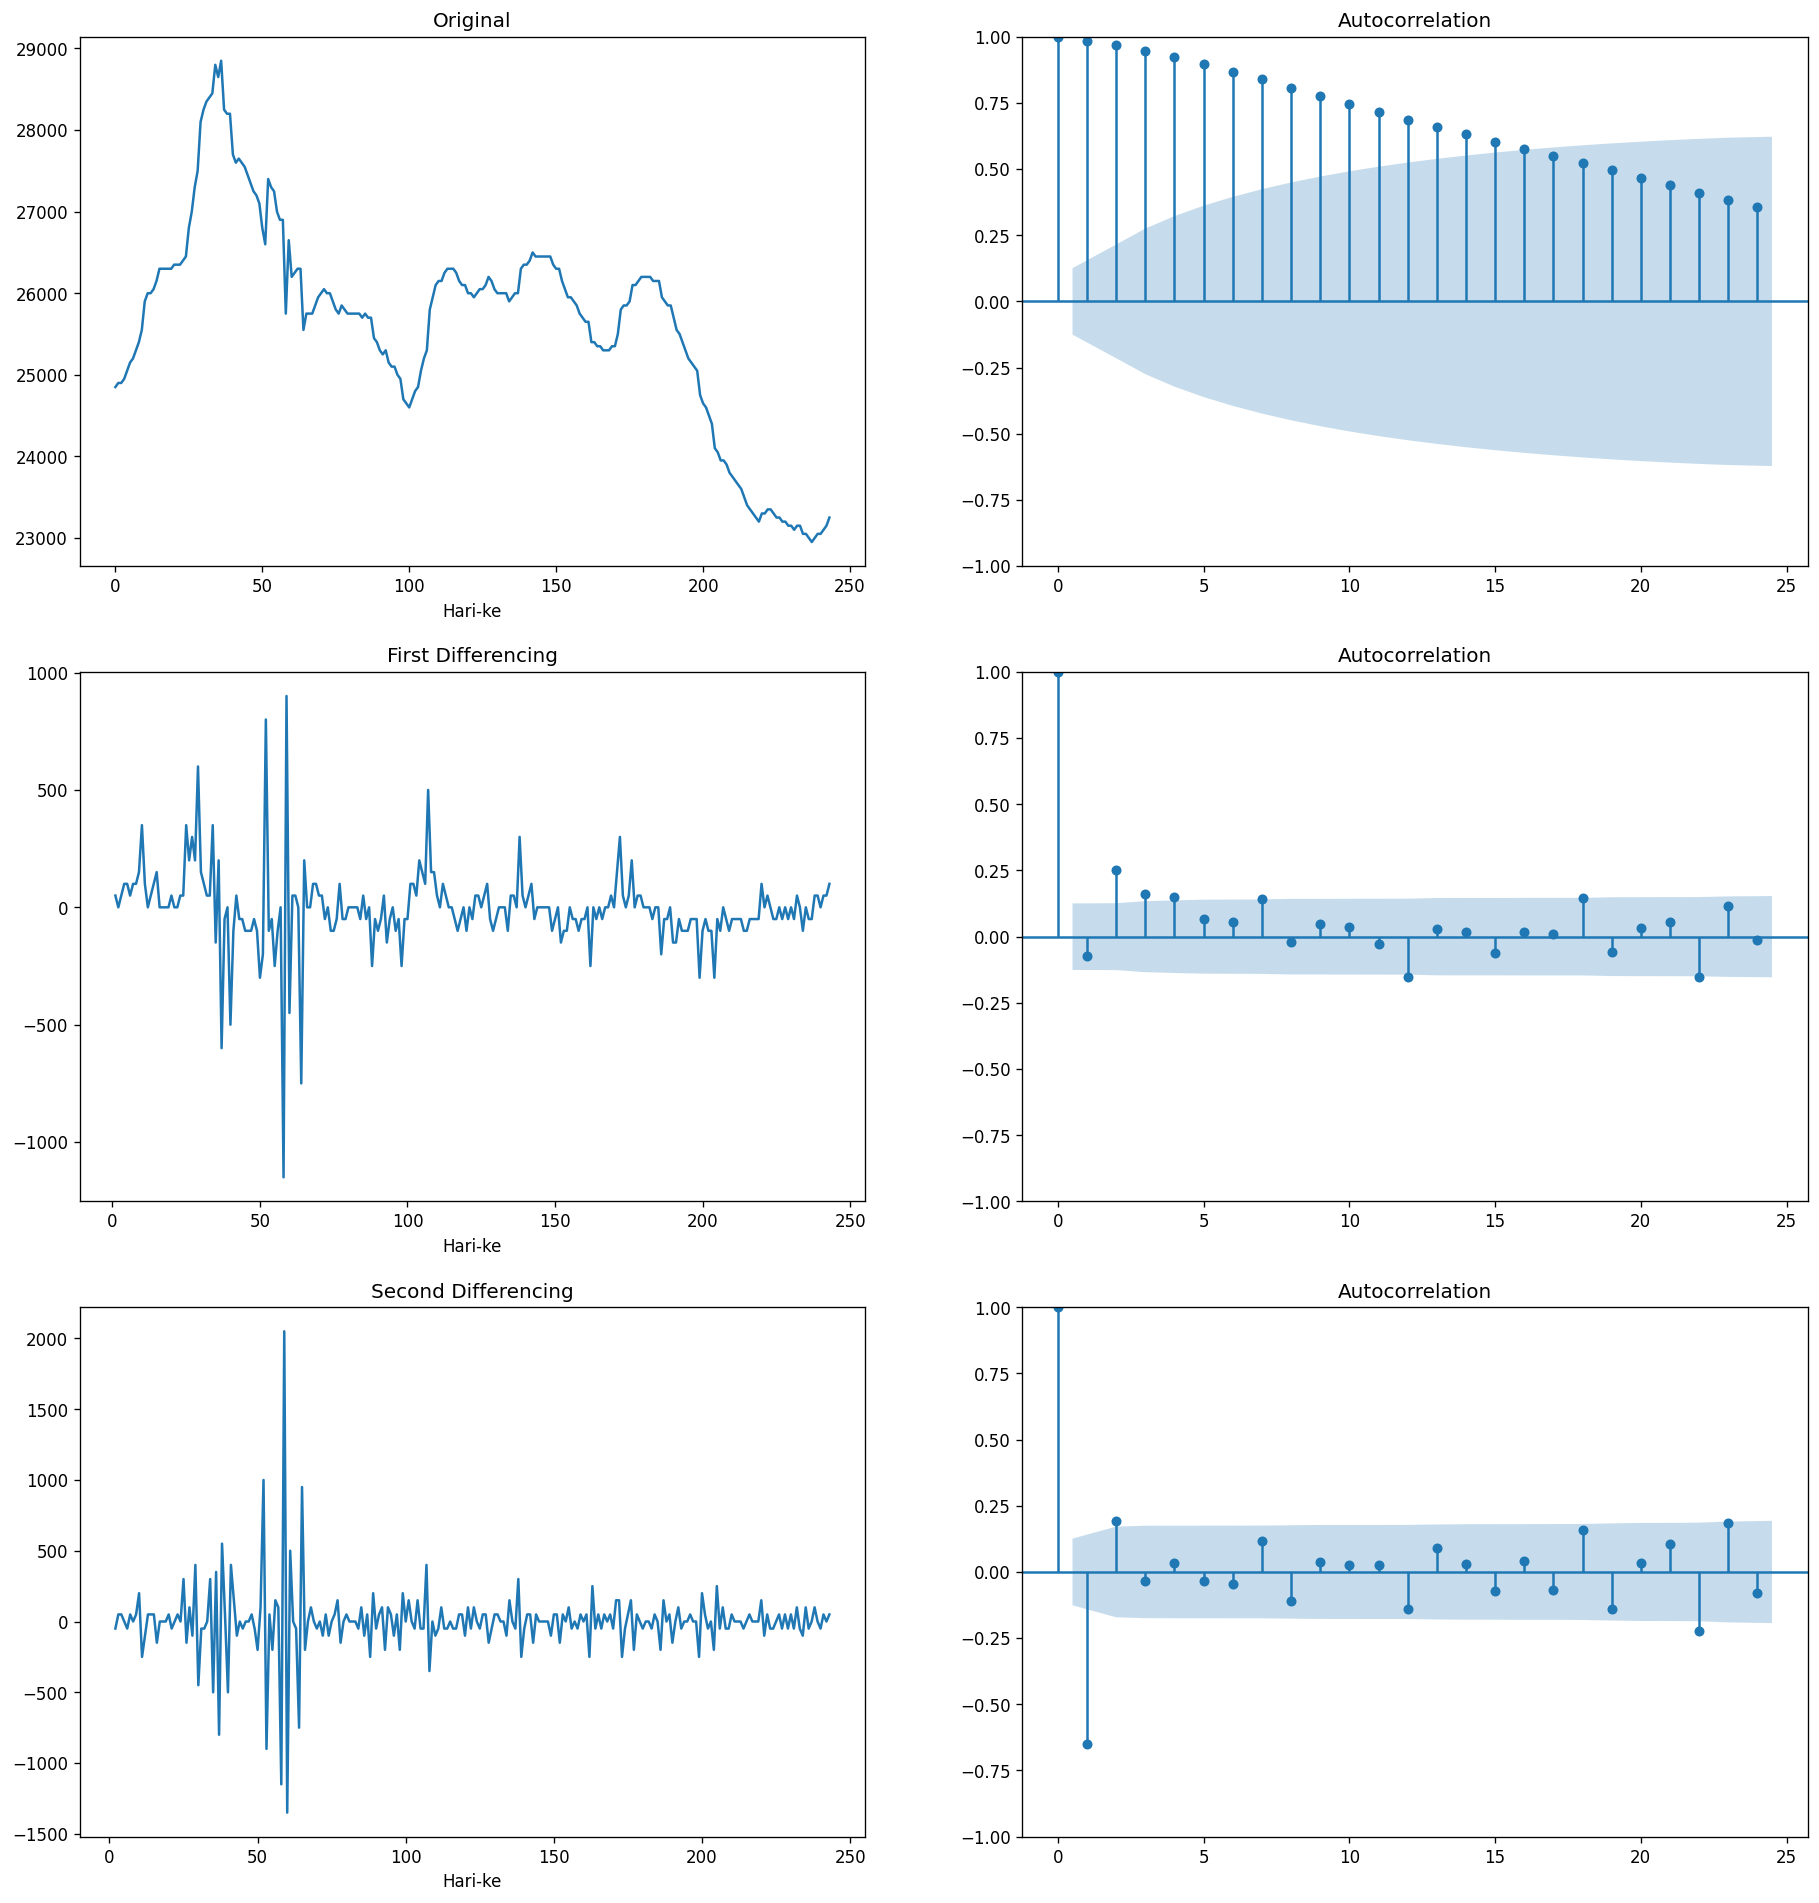

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(16,5), 'figure.dpi':120})
fig, axes = plt.subplots(3, 2)
# Original Data
sembako_telur['Telur Ayam'].plot(ax = axes[0,0], title = 'Original')
plot_acf(sembako_telur['Telur Ayam'], ax = axes[0,1])
# plt.subplots_adjust(top = 4, bottom=2, left=0)

# first differencing
sembako_telur['Telur Ayam'].diff().plot(ax = axes[1,0], title = 'First Differencing')
plot_acf(sembako_telur['Telur Ayam'].diff().dropna(), ax = axes[1,1])
# plt.subplots_adjust(top = 4, bottom=2, left=0)

# second differencing
sembako_telur['Telur Ayam'].diff().diff().plot(ax = axes[2,0], title = 'Second Differencing')
plot_acf(sembako_telur['Telur Ayam'].diff().diff().dropna(), ax = axes[2,1])
plt.subplots_adjust(top = 5, bottom=2, left=0)
plt.show()

## Cek Stasioneritas Setelah Differencing Pertama

In [17]:
sembako_telur_diff = sembako_telur['Telur Ayam'].diff().dropna()

# check stationarity
result = adfuller(sembako_telur_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[0]<0.05:
    print('Data telah stasioner')
else:
    print('Data belum stasioner')

ADF Statistic: -4.973320
p-value: 0.000025
Data telah stasioner


## Cek Stasioneritas Setelah Differencing Kedua

In [18]:
sembako_telur_diff2 = sembako_telur['Telur Ayam'].diff().diff()

# check stationarity
result = adfuller(sembako_telur_diff.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
if result[1] < 0.005:
    print('Data stasioner')
else:
    print('Data belum stasioner')

ADF Statistic: -4.973320
p-value: 0.000025
Data stasioner


* Untuk plot autokorelasi di atas, deret waktu mencapai stasioneritas dengan dua orde differencing. Tetapi saat melihat plot autokorelasi untuk diferensi ke-2, lag ke-2 masuk ke zona negatif jauh dengan cukup cepat, yang menunjukkan, deret tersebut mungkin mengalami over differencing.
* Diperoleh nilai `d = 1` atau `d = 2`.
* Karena differencing ke-2 diduga mengalami over differencing, maka data harga telur ayam cukup didiferensiasi sebanyak `d = 1` dengan nilai p-value < 0.05, maka data sudah stastioner.

# Membangun Model

## Plot Partial Autocorrelation Function (PACF)

Setiap autokorelasi dalam deret stasioner dapat diperbaiki dengan menambahkan istilah AR yang cukup. Jadi, awalnya diambil urutan istilah AR = banyak lag yang melintasi batas signifikansi di plot PACF.

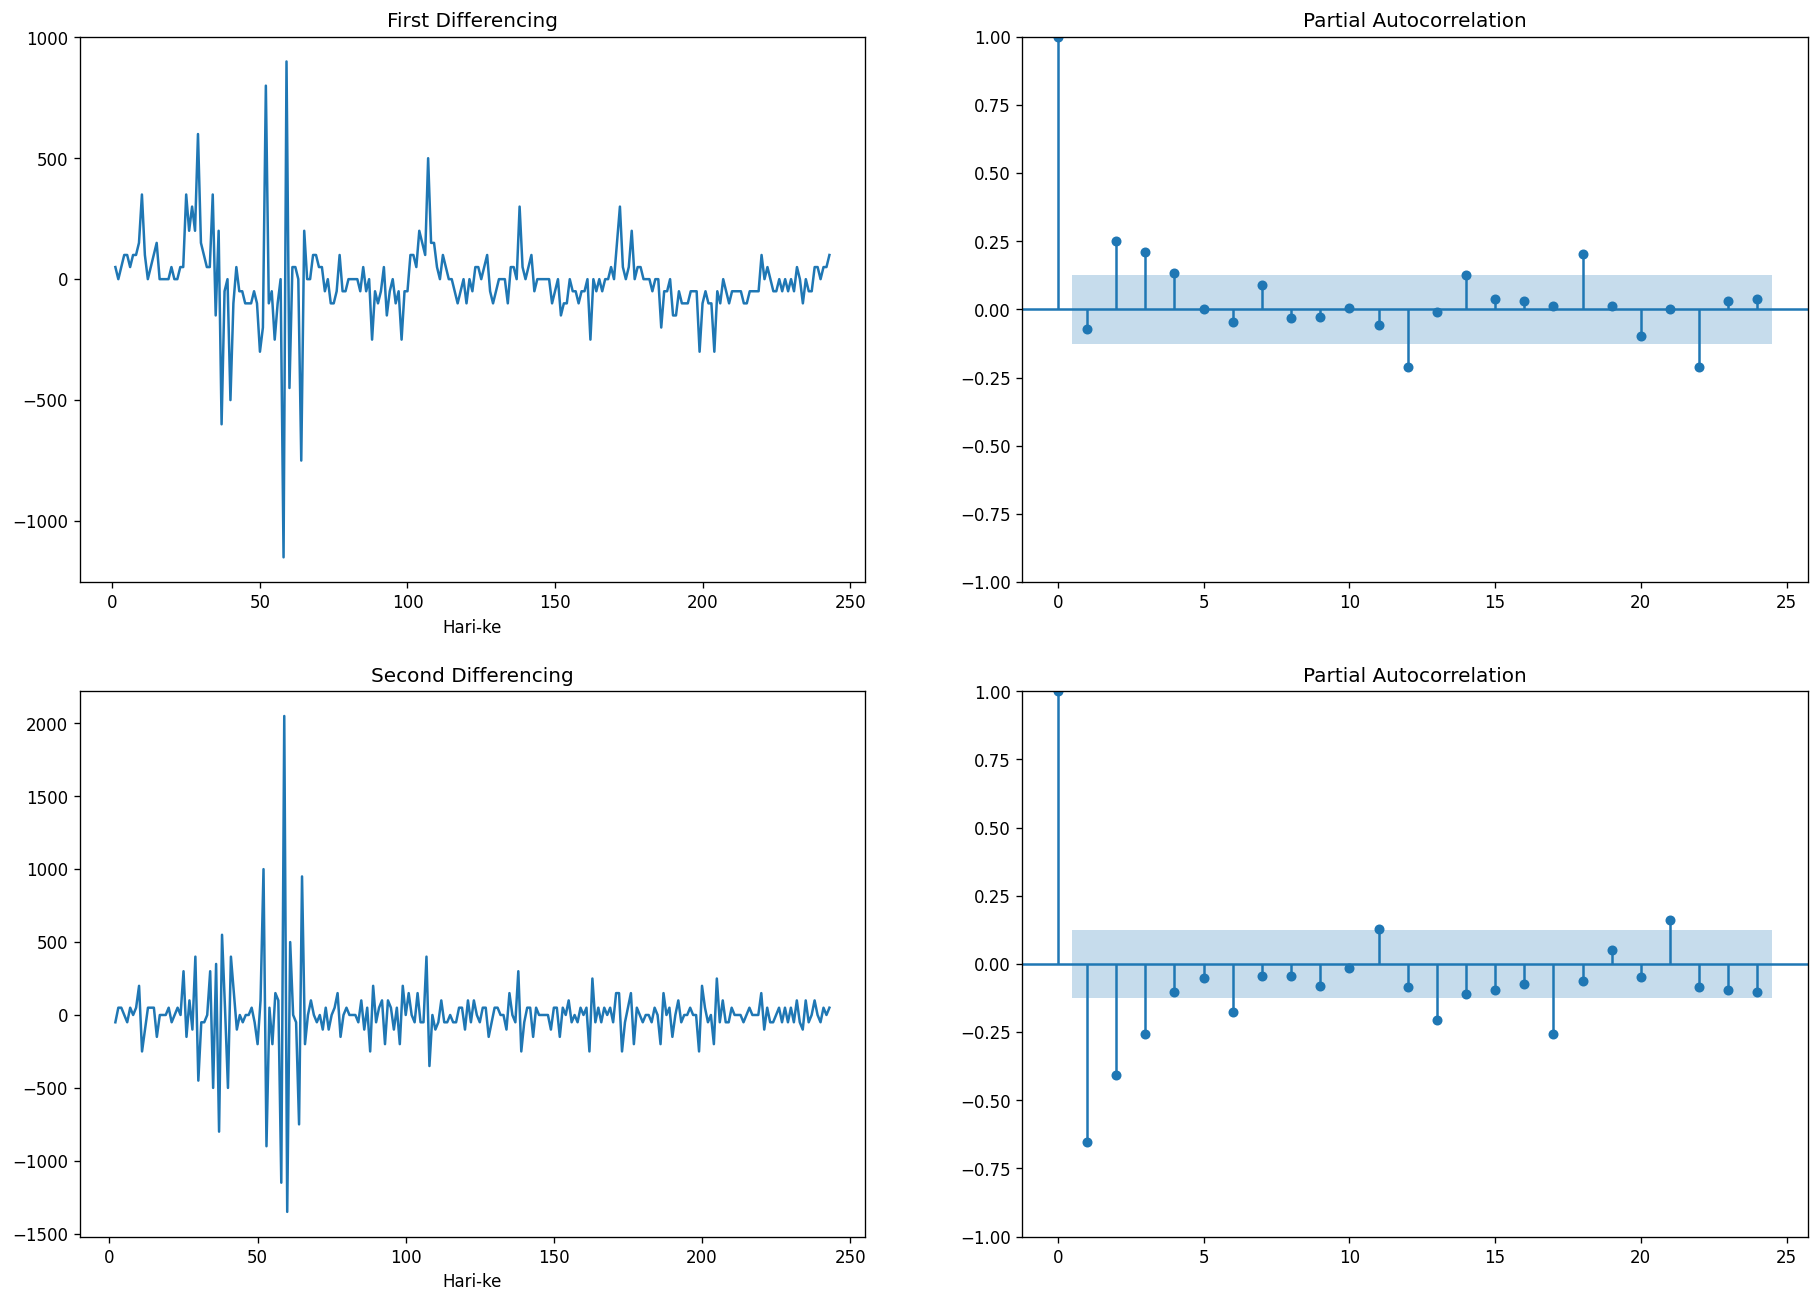

In [19]:
plt.rcParams.update({'figure.figsize':(16,5), 'figure.dpi':120})
fig, ax = plt.subplots(2,2)

#differencing pertama
sembako_telur_diff.plot(ax = ax[0,0], title='First Differencing')
plot_pacf(sembako_telur_diff.dropna(), ax = ax[0,1])

#differencing kedua
sembako_telur_diff2.plot(ax = ax[1,0], title='Second Differencing')
plot_pacf(sembako_telur_diff2.dropna(), ax = ax[1,1])

plt.subplots_adjust(top = 3, bottom=1, left=0)
plt.show()

Jika diamati dari hasil grafik PACF differencing pertama, maka lag 1 berada jauh di luar batas signifikansi, sedangakn lag kedua berada di dalam batas signifikansi.
Selanjutnya grafik differencing kedua menunjukan bahwa lag 1 dan lag 2 berada diluar batas signifikansi.

## Split Dataset

Pada Out-of-Time cross-validation, data dibagi menjadi data training (in-sample) dan testing (out-sample). Data training digunakan untuk membentuk model prediksi terbaik yang kemudian hasil prediksi akan dibandingkan dengan data testing. Dengan membagi proporsi data training dan testing sejumlah 80:20, maka digunakan formula sebagai berikut. 

In [20]:
import statsmodels as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA

# Create Training and Test
train = sembako_telur['Telur Ayam'][:195]
test = sembako_telur['Telur Ayam'][195:]

## Model (1, 1, 1)

                               SARIMAX Results                                
Dep. Variable:             Telur Ayam   No. Observations:                  195
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1288.711
Date:                Sun, 28 Nov 2021   AIC                           2583.422
Time:                        10:54:44   BIC                           2593.226
Sample:                             0   HQIC                          2587.392
                                - 195                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8936      0.106      8.456      0.000       0.686       1.101
ma.L1         -0.8264      0.127     -6.514      0.000      -1.075      -0.578
sigma2      3.453e+04   1404.866     24.577      0.0

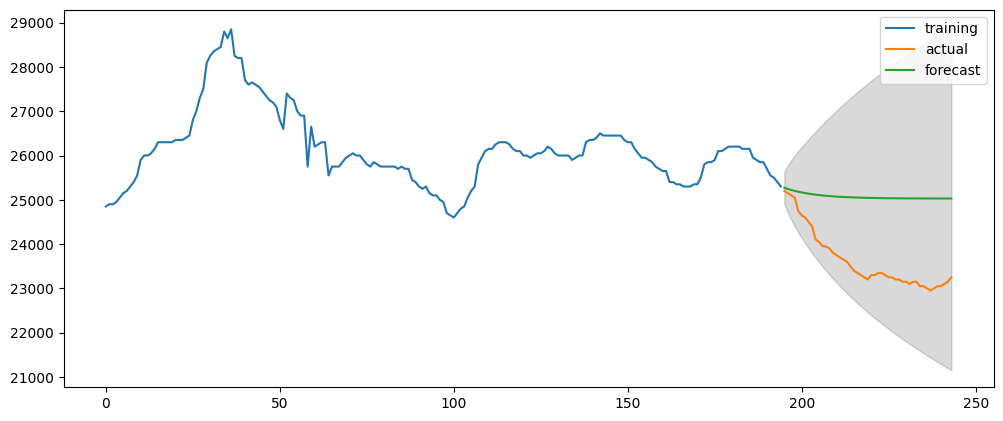

In [21]:
from statsmodels.tsa.stattools import acf

# Build Model
# model = ARIMA(train, order=(1,1,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()
print(fitted.summary())

# Forecast
fc = fitted.get_forecast(49)
pred = fc.predicted_mean

# lower and upper bound
pred_conf_int = fc.conf_int(alpha=0.05)

# Make as pandas series
fc_series = pd.Series(pred)
lower_bound = pred_conf_int['lower Telur Ayam']
upper_bound = pred_conf_int['upper Telur Ayam']

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training') # train data
plt.plot(test, label='actual') # test data
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_bound.index, lower_bound, upper_bound, 
                 color='k', alpha=.15)
plt.legend()
plt.show()

Dari tabel output hasil model ARIMA (1,1,1), model AR(1) dan MA(1) < 0,05 sehingga model sudah signifikan.

## Plot Residual Order (1, 1, 1)

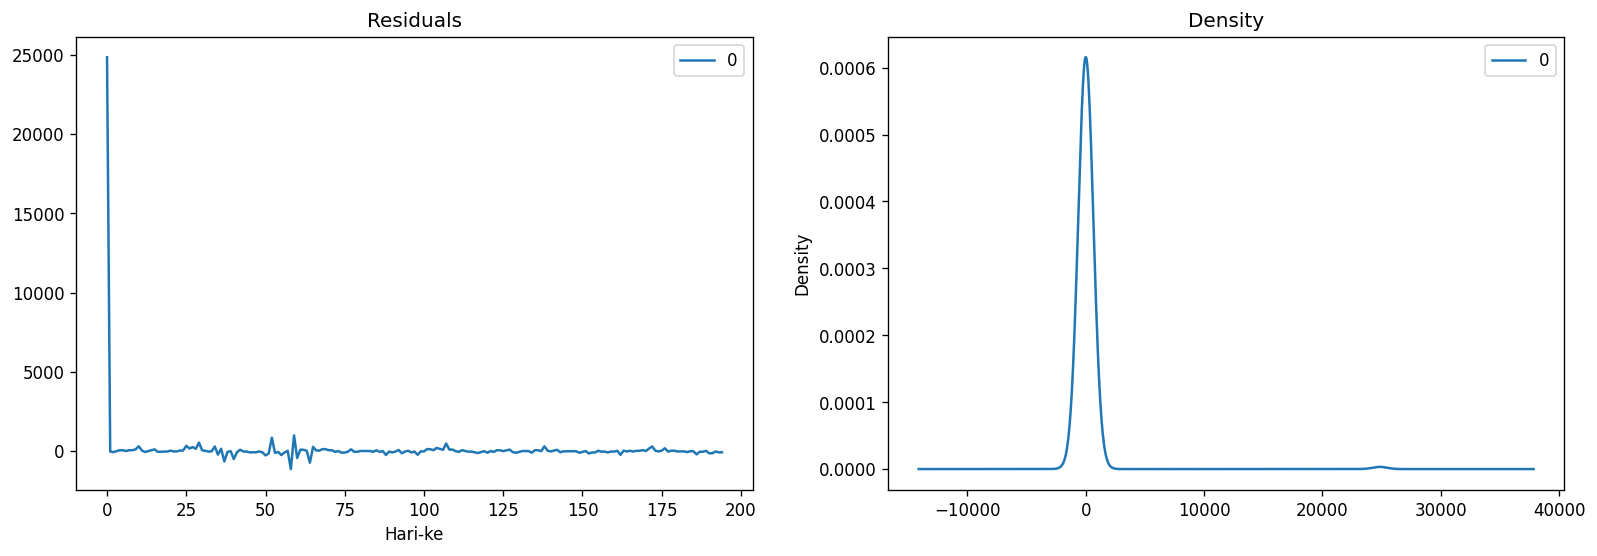

In [22]:
# Plot residual errors
residuals = pd.DataFrame(fitted.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

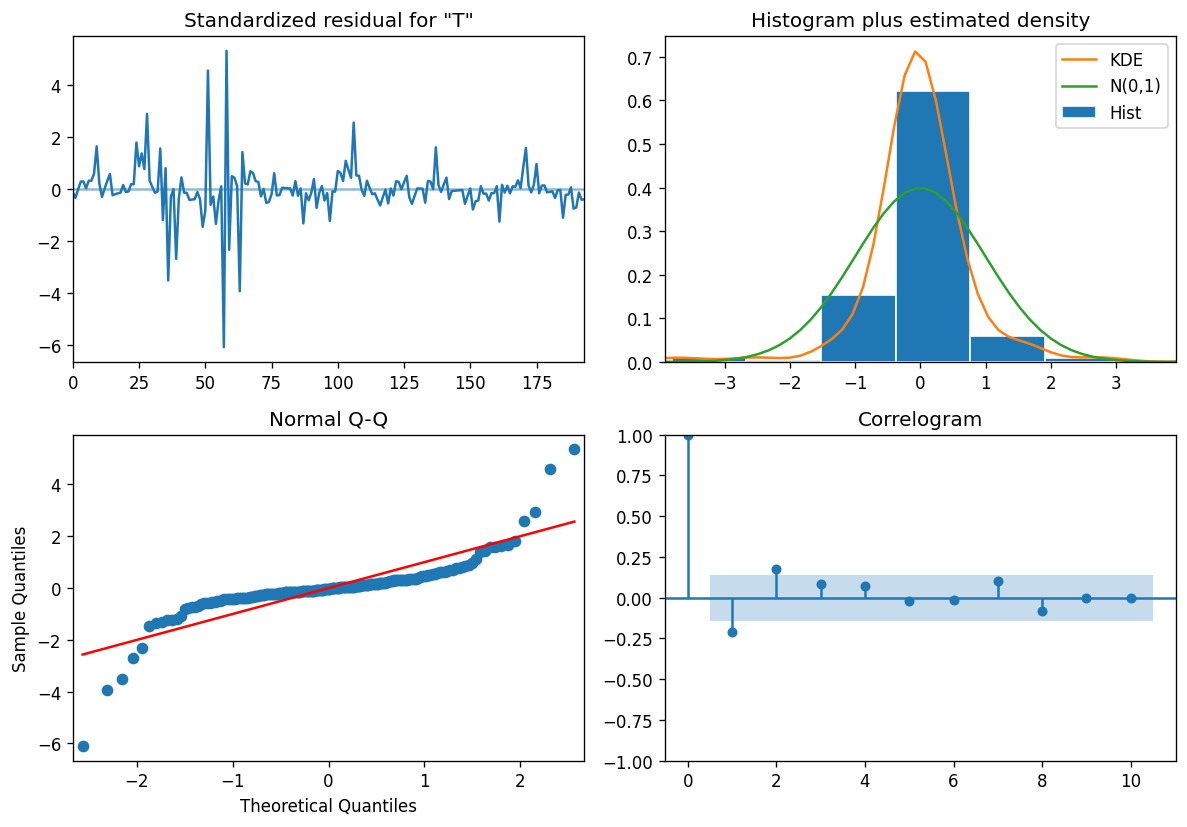

In [23]:
fitted.plot_diagnostics(figsize=(10,7))
plt.tight_layout()
plt.show()

Dari grafik Normal Q-Q Plot dapat dijelaskan bahwa: 
* Titik-titik di sekitar garis adalah keadaan data yang diuji normalitasnya (harga telur ayam)
* Apabila sebagian besar titik berada sangat dekat atau menempel pada garis dapat disimpulkan bahwa residual berdistribusi normal.
* Apabila terdapat minimal satu titik yang berada jauh atau diluar garis Q-Q Plots maka meandakan ada residual yang tidak berdistirbusi normal

## Matriks Akurasi Model (1, 1, 1)

Metode pengujian akurasi kebaikan model:
* MSE : Mean Squared Error (MSE) adalah Rata-rata Kesalahan kuadrat diantara nilai aktual dan nilai peramalan. Metode Mean Squared Error secara umum digunakan untuk mengecek estimasi berapa nilai kesalahan pada peramalan. Nilai Mean Squared Error yang rendah atau nilai mean squared error mendekati nol menunjukkan bahwa hasil peramalan sesuai dengan data aktual dan bisa dijadikan untuk perhitungan peramalan di periode mendatang. 
* MAE : MAE menunjukkan nilai kesalahan atau perbedaan nilai sebenarnya dengan nilai peramalan. Perbedaan (kesalahan) yang diharapkan tentu saja adalah kesalahan yang terkecil. Nilai MAE seringkali digunakan dalam membandingkan dua model dalam melakukan peramalan. Semakin kecil nilai MAE, semakin baik model tersebut dalam melakukan peramalan. Oleh karena itu, dalam melakukan perbadingan dua atau beberapa model statistik, maka model terbaik adalah model yang memiliki nilai MAE terkecil.
* MAPE : MAPE termasuk alat ukur ketepatan model peramalan yang paling sering digunakan dibandingkan MAE, RMSE atau lainnya. Hal ini karena nilai MAPE lebih mudah diinterpretasikan dibandingkan alat ukur yang lain tersebut. 
* RMSE : RMSE dapat berkisar dari 0 hingga ∞. RMSE dapat berorientasi negatif dimana nilai yang lebih rendah menunjukkan nilai yang lebih baik. Jika nilai RMSE lebih kecil, hal ini berarti bahwa nilai yang diprediski dekat dengan nilai yang diamati atau observasi, dan sebaliknya.

In [24]:
from sklearn import metrics
fc_mse = metrics.mean_squared_error(test, pred) #Mean Squared Error
fc_mae = metrics.mean_absolute_error(test, pred) #Mean Absolute Error
fc_rmse = np.sqrt(fc_mse) #Root Mean Squared Error
fc_mape = metrics.mean_absolute_percentage_error(test, pred) #Mean Absolute Percentage Error


print('Mean Squared Error: %.3f' % fc_mse)
print('Mean Absolute Error: %.3f' % fc_mae)
print('Mean Absolute Percentage Error: %.3f' % fc_mape)
print('Root Mean Squared Error: %.3f' % fc_rmse)

Mean Squared Error: 2438774.128
Mean Absolute Error: 1447.752
Mean Absolute Percentage Error: 0.062
Root Mean Squared Error: 1561.657


## Dataframe Baru Model (1, 1, 1)

In [25]:
table = np.concatenate((test.values.reshape(-1,1), pred.values.reshape(-1,1)), axis=1)
new_dataframe = pd.DataFrame(data=table, columns=['actual','predict'], index=test.index)
new_dataframe.head()

,actual,predict
Hari-ke,,
195,25200.0,25271.044143
196,25150.0,25245.168616
197,25100.0,25222.045732
198,25050.0,25201.382666
199,24750.0,25182.917741


## Model (1, 1, 2)

                               SARIMAX Results                                
Dep. Variable:             Telur Ayam   No. Observations:                  195
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1280.319
Date:                Sun, 28 Nov 2021   AIC                           2568.637
Time:                        10:54:53   BIC                           2581.709
Sample:                             0   HQIC                          2573.930
                                - 195                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6943      0.156      4.441      0.000       0.388       1.001
ma.L1         -0.8241      0.168     -4.903      0.000      -1.154      -0.495
ma.L2          0.3007      0.057      5.296      0.0

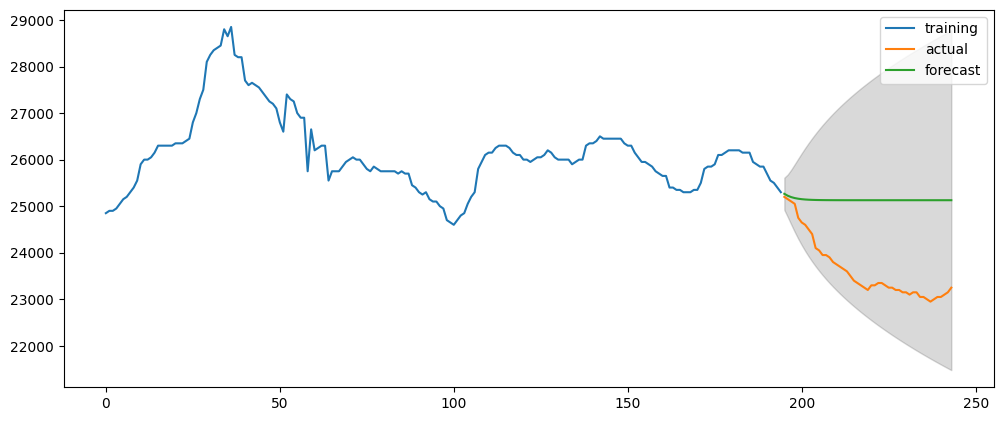

In [26]:
from statsmodels.tsa.stattools import acf

# Build Model
# model = ARIMA(train, order=(1,1,2))  
model = ARIMA(train, order=(1, 1, 2))  
fitted = model.fit() 
print(fitted.summary())

# Forecast
fc = fitted.get_forecast(49)
pred = fc.predicted_mean

# lower and upper bound
pred_conf_int = fc.conf_int(alpha=0.05)

# Make as pandas series
fc_series = pd.Series(pred)
lower_bound = pred_conf_int['lower Telur Ayam']
upper_bound = pred_conf_int['upper Telur Ayam']

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training') # train data
plt.plot(test, label='actual') # test data
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_bound.index, lower_bound, upper_bound, 
                 color='k', alpha=.15)
plt.legend()
plt.show()

Dari tabel output hasil model ARIMA (1,1,1), model AR(1) dan MA(2) < 0,05 sehingga model sudah signifikan.

## Plot Residual Order (1, 1, 2)

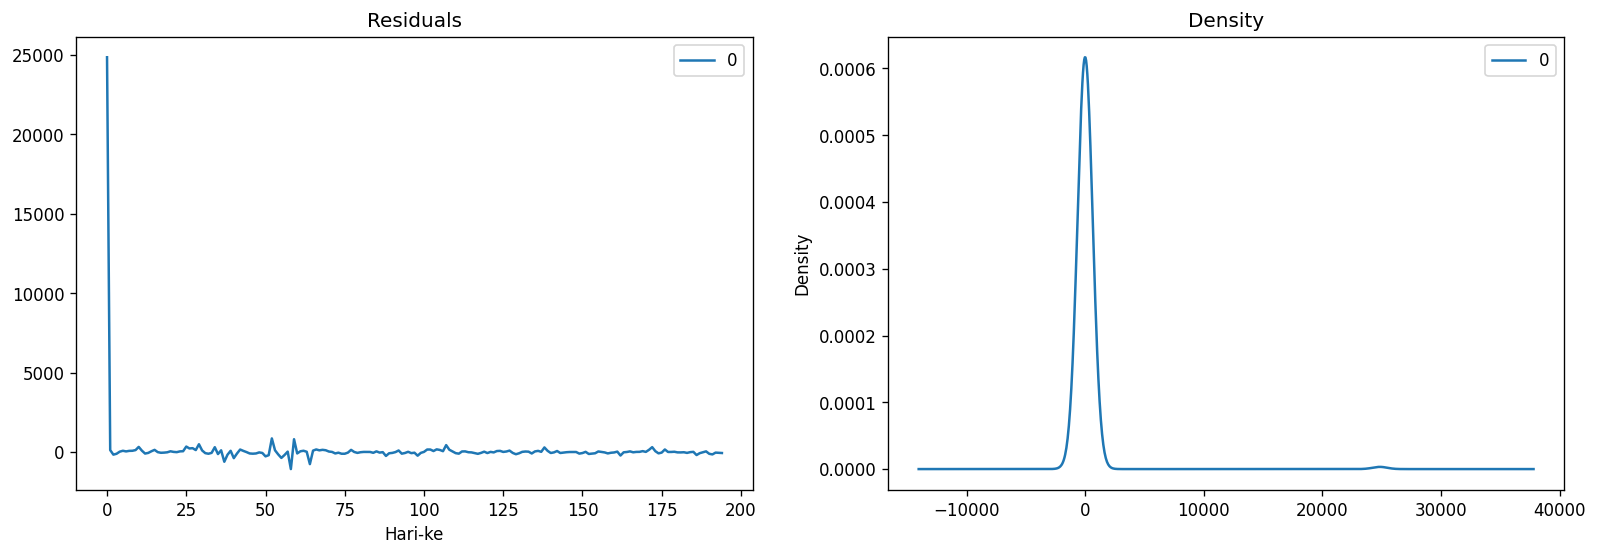

In [27]:
# Plot residual errors
residuals = pd.DataFrame(fitted.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

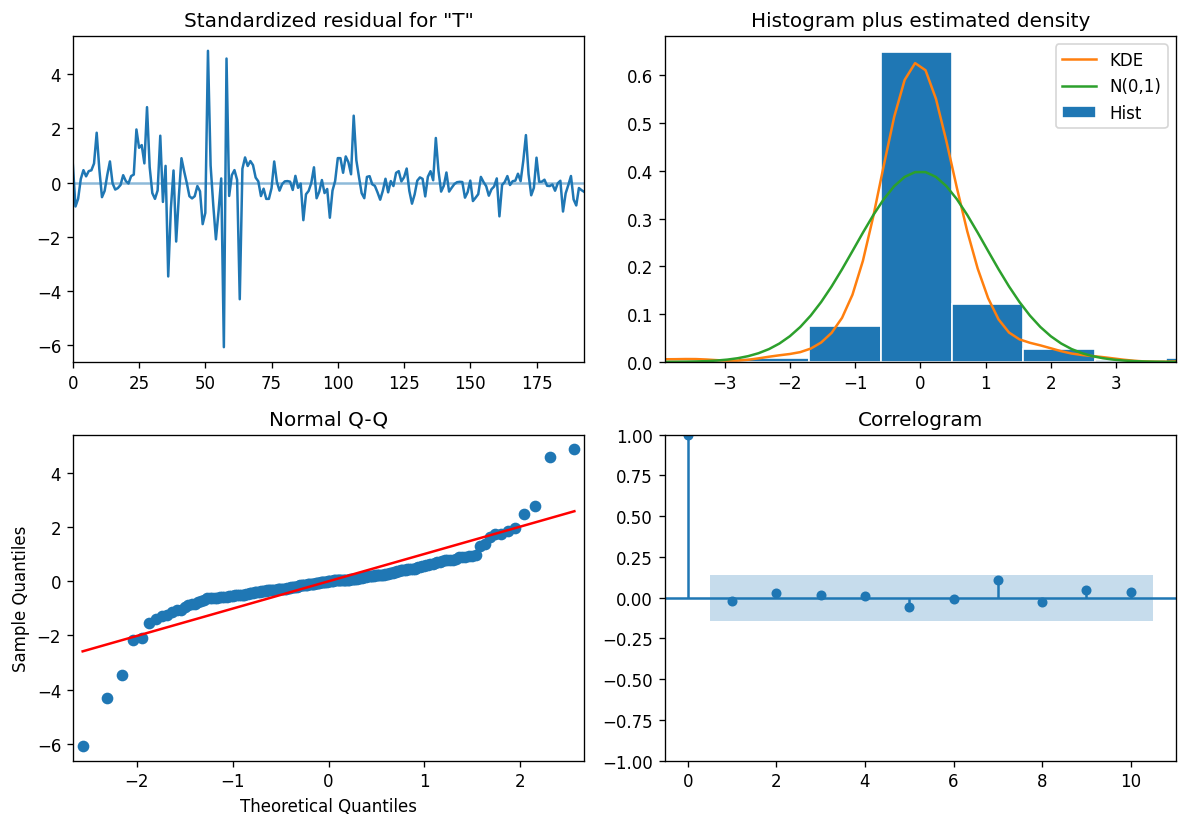

In [28]:
fitted.plot_diagnostics(figsize=(10,7))
plt.tight_layout()
plt.show()

Dari grafik Normal Q-Q Plot dapat dijelaskan bahwa: 
* Titik-titik di sekitar garis adalah keadaan data yang diuji normalitasnya (harga telur ayam)
* Apabila sebagian besar titik berada sangat dekat atau menempel pada garis dapat disimpulkan bahwa residual berdistribusi normal.
* Apabila terdapat minimal satu titik yang berada jauh atau diluar garis Q-Q Plots maka meandakan ada residual yang tidak berdistirbusi normal

## Matriks Akurasi Model (1, 1, 2)

Metode pengujian akurasi kebaikan model:
* MSE : Mean Squared Error (MSE) adalah Rata-rata Kesalahan kuadrat diantara nilai aktual dan nilai peramalan. Metode Mean Squared Error secara umum digunakan untuk mengecek estimasi berapa nilai kesalahan pada peramalan. Nilai Mean Squared Error yang rendah atau nilai mean squared error mendekati nol menunjukkan bahwa hasil peramalan sesuai dengan data aktual dan bisa dijadikan untuk perhitungan peramalan di periode mendatang. 
* MAE : MAE menunjukkan nilai kesalahan atau perbedaan nilai sebenarnya dengan nilai peramalan. Perbedaan (kesalahan) yang diharapkan tentu saja adalah kesalahan yang terkecil. Nilai MAE seringkali digunakan dalam membandingkan dua model dalam melakukan peramalan. Semakin kecil nilai MAE, semakin baik model tersebut dalam melakukan peramalan. Oleh karena itu, dalam melakukan perbadingan dua atau beberapa model statistik, maka model terbaik adalah model yang memiliki nilai MAE terkecil.
* MAPE : MAPE termasuk alat ukur ketepatan model peramalan yang paling sering digunakan dibandingkan MAE, RMSE atau lainnya. Hal ini karena nilai MAPE lebih mudah diinterpretasikan dibandingkan alat ukur yang lain tersebut. 
* RMSE : RMSE dapat berkisar dari 0 hingga ∞. RMSE dapat berorientasi negatif dimana nilai yang lebih rendah menunjukkan nilai yang lebih baik. Jika nilai RMSE lebih kecil, hal ini berarti bahwa nilai yang diprediski dekat dengan nilai yang diamati atau observasi, dan sebaliknya.

In [29]:
from sklearn import metrics
fc_mse = metrics.mean_squared_error(test, pred) #Mean Squared Error
fc_mae = metrics.mean_absolute_error(test, pred) #Mean Absolute Error
fc_rmse = np.sqrt(fc_mse) #Root Mean Squared Error
fc_mape = metrics.mean_absolute_percentage_error(test, pred) #Mean Absolute Percentage Error


print('Mean Squared Error: %.3f' % fc_mse)
print('Mean Absolute Error: %.3f' % fc_mae)
print('Mean Absolute Percentage Error: %.3f' % fc_mape)
print('Root Mean Squared Error: %.3f' % fc_rmse)

Mean Squared Error: 2675309.341
Mean Absolute Error: 1510.825
Mean Absolute Percentage Error: 0.065
Root Mean Squared Error: 1635.637


## Dataframe Baru Model (1, 1, 2)

In [30]:
table = np.concatenate((test.values.reshape(-1,1), pred.values.reshape(-1,1)), axis=1)
new_dataframe = pd.DataFrame(data=table, columns=['actual','predict'], index=test.index)
new_dataframe.head()

,actual,predict
Hari-ke,,
195,25200.0,25265.784554
196,25150.0,25223.709726
197,25100.0,25194.498994
198,25050.0,25174.219248
199,24750.0,25160.139898


## Perbandingan Hasil Akurasi Model ARIMA (1,1,1) dan ARIMA (1, 1, 2)

Metode pengujian akurasi kebaikan model:
* MSE : Mean Squared Error (MSE) adalah Rata-rata Kesalahan kuadrat diantara nilai aktual dan nilai peramalan. Metode Mean Squared Error secara umum digunakan untuk mengecek estimasi berapa nilai kesalahan pada peramalan. Nilai Mean Squared Error yang rendah atau nilai mean squared error mendekati nol menunjukkan bahwa hasil peramalan sesuai dengan data aktual dan bisa dijadikan untuk perhitungan peramalan di periode mendatang. 
* MAE : MAE menunjukkan nilai kesalahan atau perbedaan nilai sebenarnya dengan nilai peramalan. Perbedaan (kesalahan) yang diharapkan tentu saja adalah kesalahan yang terkecil. Nilai MAE seringkali digunakan dalam membandingkan dua model dalam melakukan peramalan. Semakin kecil nilai MAE, semakin baik model tersebut dalam melakukan peramalan. Oleh karena itu, dalam melakukan perbadingan dua atau beberapa model statistik, maka model terbaik adalah model yang memiliki nilai MAE terkecil.
* MAPE : MAPE termasuk alat ukur ketepatan model peramalan yang paling sering digunakan dibandingkan MAE, RMSE atau lainnya. Hal ini karena nilai MAPE lebih mudah diinterpretasikan dibandingkan alat ukur yang lain tersebut. 
* RMSE : RMSE dapat berkisar dari 0 hingga ∞. RMSE dapat berorientasi negatif dimana nilai yang lebih rendah menunjukkan nilai yang lebih baik. Jika nilai RMSE lebih kecil, hal ini berarti bahwa nilai yang diprediski dekat dengan nilai yang diamati atau observasi, dan sebaliknya.

ARIMA (1,1,1):
* Mean Squared Error: 2438774.128
* Mean Absolute Error: 1447.752
* Mean Absolute Percentage Error: 0.062
* Root Mean Squared Error: 1561.657

ARIMA (1,1,1):
* Mean Squared Error: 2675309.341
* Mean Absolute Error: 1510.825
* Mean Absolute Percentage Error: 0.065
* Root Mean Squared Error: 1635.637

Hasil kedua model menunjukan bahwa seluruh parameter kebaikan model ARIMA (1,1,1) memiliki nilai yang lebih kecil dibandingkan dengan model ARIMA (1,1,2), sehingga ARIMA (1,1,1) dipilih sebagai model terbaik dengan interpretasi hasil akurasi kebaikan model sebagai berikut.
* MSE : Lebih kecil dari MSE model ARIMA (1,1,2), sehingga lebih baik untuk digunakan sebagai model peramalan.
* MAE : Lebih kecil dari MAE model ARIMA (1,1,2), sehingga lebih baik untuk digunakan sebagai model peramalan.
* MAPE : Nilai MAPE sebesar 0,062% dapat diartikan bahwa selisih rata-rata nilai peramalan dengan nilai sebenarnya adalah 0,062%, sehingga hasil peramalan sangat akurat.
* RMSE : Lebih kecil dari RMSE model ARIMA (1,1,2), sehingga lebih baik untuk digunakan sebagai model peramalan.